In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
from citipy import citipy
import random
from scipy import stats

from config import api_key


,City,Latitude,Temperature,Humidity,Cloudiness,Wind Speed


In [40]:
base_url = "http://api.openweathermap.org/data/2.5/weather?"

cities = []
cit_names = []
lats = []
temps = []
humids = []
clouds = []
winds = []
lngs = []

while len(cities)<500:
    lat = random.uniform(-90, 90)
    lng = random.uniform(0, 180)
    city = citipy.nearest_city(lat, lng)
    url = f"{base_url}q={city.city_name},{city.country_code}&appid={api_key}"
    req = requests.get(url).json()
    if (city not in cities) & ("name" in req.keys()):
        cities.append(city)
        cit_names.append(req["name"])
        lats.append(req["coord"]["lat"])
        lngs.append(req["coord"]["lon"])
        temps.append(req["main"]["temp"])
        humids.append(req["main"]["humidity"])
        clouds.append(req["clouds"]["all"])
        winds.append(req["wind"]["speed"])
        print(f"Fetching {city.city_name}  {len(cities)}")




Fetching albany  1
Fetching donauworth  2
Fetching suntar  3
Fetching lakes entrance  4
Fetching wakkanai  5
Fetching saint-philippe  6
Fetching mahon  7
Fetching pevek  8
Fetching ust-kut  9
Fetching blagnac  10
Fetching carnarvon  11
Fetching kualakapuas  12
Fetching suluq  13
Fetching hasaki  14
Fetching yerbogachen  15
Fetching khatanga  16
Fetching sorokino  17
Fetching beringovskiy  18
Fetching port alfred  19
Fetching roald  20
Fetching christchurch  21
Fetching bluff  22
Fetching fengkou  23
Fetching dawei  24
Fetching waipawa  25
Fetching namatanai  26
Fetching butaritari  27
Fetching pundaguitan  28
Fetching dikson  29
Fetching igarka  30
Fetching tuatapere  31
Fetching east london  32
Fetching hobart  33
Fetching kyra  34
Fetching nikolskoye  35
Fetching preobrazheniye  36
Fetching ardahan  37
Fetching petropavlovsk-kamchatskiy  38
Fetching zhangye  39
Fetching szekszard  40
Fetching albert  41
Fetching hithadhoo  42
Fetching severo-kurilsk  43
Fetching bredasdorp  44
Fetchi

Fetching hirado  363
Fetching dali  364
Fetching gornopravdinsk  365
Fetching margate  366
Fetching kota belud  367
Fetching verkhoyansk  368
Fetching berlevag  369
Fetching seoni malwa  370
Fetching asbe teferi  371
Fetching ylojarvi  372
Fetching valea mare  373
Fetching izumo  374
Fetching bandarbeyla  375
Fetching leshukonskoye  376
Fetching temir  377
Fetching elsfleth  378
Fetching yangjiang  379
Fetching karratha  380
Fetching wajir  381
Fetching manokwari  382
Fetching gornyak  383
Fetching scarborough  384
Fetching baykit  385
Fetching wanning  386
Fetching byumba  387
Fetching zaria  388
Fetching eydhafushi  389
Fetching vanavara  390
Fetching mashhad  391
Fetching huty  392
Fetching tavda  393
Fetching kyren  394
Fetching anadyr  395
Fetching grand gaube  396
Fetching ilebo  397
Fetching tendukheda  398
Fetching trat  399
Fetching zalantun  400
Fetching graben-neudorf  401
Fetching kushima  402
Fetching manturovo  403
Fetching shache  404
Fetching ibra  405
Fetching nizhniy 

In [42]:
df = pd.DataFrame({"City": cit_names,
                  "Latitude": lats,
                   "Longitude": lngs,
                  "Temperature": temps,
                  "Humidity": humids,
                  "Cloudiness": clouds,
                  "Wind Speed": winds})
df["Temperature"] = [(x-273.15)*9/5+32 for x in df["Temperature"]]
df.head()

df.to_csv("../Vacation/cities.csv", index=False)


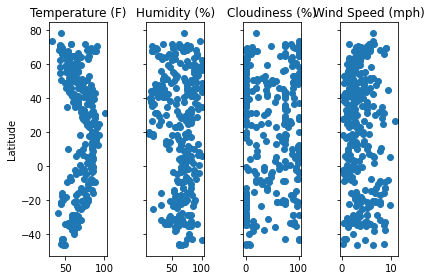

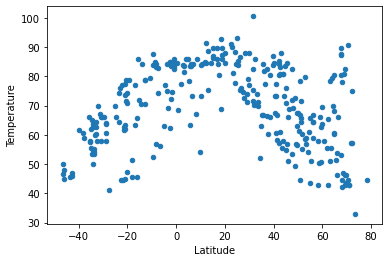

In [18]:
df.plot("Latitude", "Temperature", kind="scatter")


The plot above shows 500 random cities current temperature vs its latitude. We can see a trend of higher temperature for cities closer to the equator.

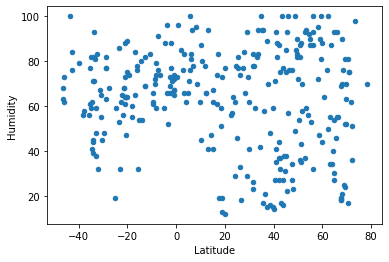

In [19]:
df.plot("Latitude", "Humidity", kind="scatter")

This plot shows the humidity of the cities vs the latitude. There seems to be a weak connection between high humidity and low latitude

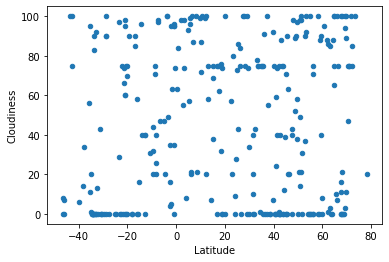

In [20]:
df.plot("Latitude", "Cloudiness", kind="scatter")

This plot shows the cloudiness of the cities vs the latitude. There is no obvious trend showcassed here.

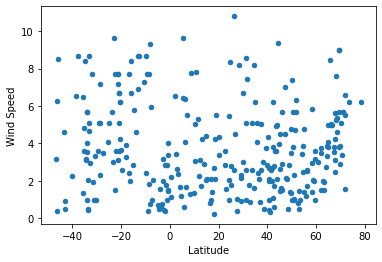

In [21]:
df.plot("Latitude","Wind Speed", kind="scatter")

This plot shows the wind speed vs the latitude. I see no obvious connections between these variables from this plot.

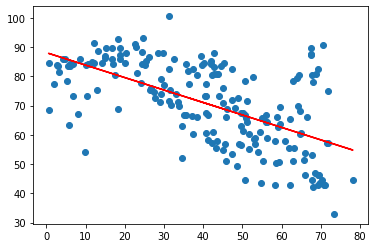

In [29]:
ndf = df.loc[df["Latitude"]>0]
sdf = df.loc[df["Latitude"]<0]

def liner(x, y):
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    return [slope, intercept]

slope, intercept = liner(ndf["Latitude"], ndf["Temperature"])
plt.plot(ndf["Latitude"], ndf["Temperature"],"o", label="data")
plt.plot(ndf["Latitude"], intercept + slope*ndf["Latitude"], "r", label="fitted line")

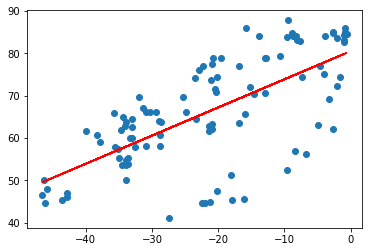

In [30]:
slope, intercept = liner(sdf["Latitude"], sdf["Temperature"])
plt.plot(sdf["Latitude"], sdf["Temperature"], "o", label="data")
plt.plot(sdf["Latitude"], intercept + slope*sdf["Latitude"], "r", label="fitted line")

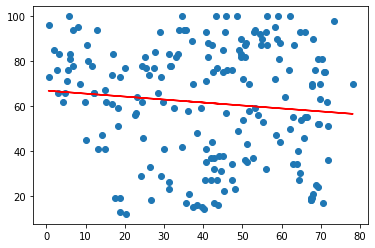

In [31]:
slope, intercept = liner(ndf["Latitude"], ndf["Humidity"])
plt.plot(ndf["Latitude"], ndf["Humidity"],"o", label="data")
plt.plot(ndf["Latitude"], intercept + slope*ndf["Latitude"], "r", label="fitted line")

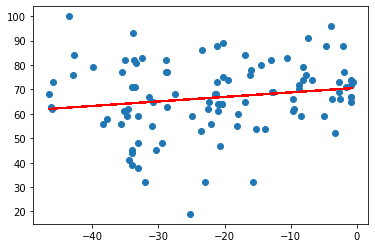

In [32]:
slope, intercept = liner(sdf["Latitude"], sdf["Humidity"])
plt.plot(sdf["Latitude"], sdf["Humidity"], "o", label="data")
plt.plot(sdf["Latitude"], intercept + slope*sdf["Latitude"], "r", label="fitted line")

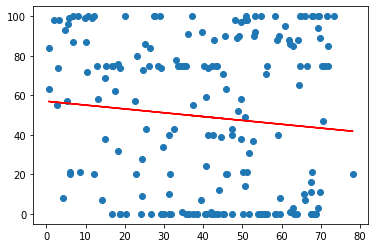

In [33]:
slope, intercept = liner(ndf["Latitude"], ndf["Cloudiness"])
plt.plot(ndf["Latitude"], ndf["Cloudiness"],"o", label="data")
plt.plot(ndf["Latitude"], intercept + slope*ndf["Latitude"], "r", label="fitted line")

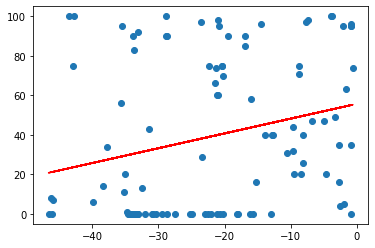

In [34]:
slope, intercept = liner(sdf["Latitude"], sdf["Cloudiness"])
plt.plot(sdf["Latitude"], sdf["Cloudiness"], "o", label="data")
plt.plot(sdf["Latitude"], intercept + slope*sdf["Latitude"], "r", label="fitted line")

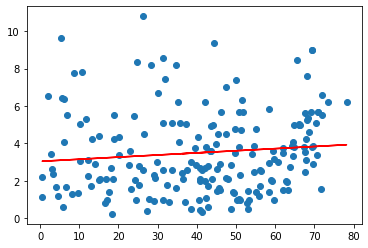

In [35]:
slope, intercept = liner(ndf["Latitude"], ndf["Wind Speed"])
plt.plot(ndf["Latitude"], ndf["Wind Speed"],"o", label="data")
plt.plot(ndf["Latitude"], intercept + slope*ndf["Latitude"], "r", label="fitted line")

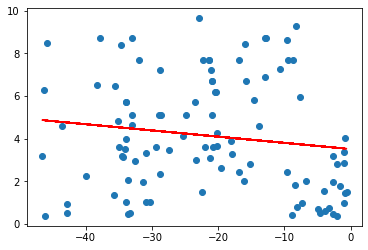

In [36]:
slope, intercept = liner(sdf["Latitude"], sdf["Wind Speed"])
plt.plot(sdf["Latitude"], sdf["Wind Speed"], "o", label="data")
plt.plot(sdf["Latitude"], intercept + slope*sdf["Latitude"], "r", label="fitted line")